# Predicting Breast Cancer whit different Models



## Abstract

We predict malignant vs. benign breast tumors using the Breast Cancer dataset. After standardizing features and splitting the data (70/30), we evaluate four models—Linear Regression, Multi-Layer Perceptron, Decision Tree and RBF-kernel SVM. The best performance comes from the MLP (Accuracy ≈ 0.98), closely followed by the SVM (≈ 0.97). We provide an overview of the data, exploratory analysis highlights, per-model results with confusion matrices, and a comparison section

---
## Overview

Goal: Binary classification of breast tumors (malignant = 0, benign = 1) from 30 continuous features.

Data: 569 samples; class distribution is moderately imbalanced (benign 357, malignant 212).

Pipeline: Train/test split (70/30, random_state=42), standardization (z-score), model training, evaluation on the test set.

Models: Linear Regression ,, Multi-Layer Perceptron, Decision Tree, SVM

Metrics: Accuracy and confusion matrices.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [41]:
# load the data from sklearn
data = load_breast_cancer()
# Split
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name = "target")

In [42]:
# Dataset inspection for futher information
# Shape of the ds
print("X shape:", X.shape)
print("y shape:", y.shape)

# First 5 row of X
print("X first 5 row: \n", X.head())
print("y first 5 row: \n", y.head())

# Information about missing values
print("NaN information:")
print("X:", X.isna().sum().sum())
print("y:", y.isna().sum())

# Summary
print("Summary stats: \n", X.describe().T.head())

X shape: (569, 30)
y shape: (569,)
X first 5 row: 
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst ra

In [43]:
# Split data in train/test sets
# Test = 20% of the data, random state fixed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)


##Data Exploration

### Class Distribution
There is a simple bar chart of the target counts.
We observe a small imabalance between benign and malignant.
Class balance directly affects model selection.

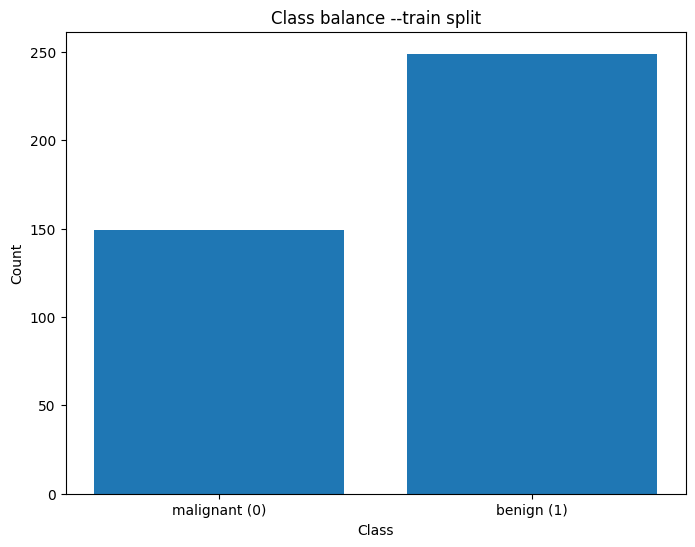

In [44]:
# Distribution of the target set
counts = y_train.value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts.values)
plt.title("Class balance --train split")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ["malignant (0)", "benign (1)"])
plt.show()

### Kernel Density Plot

For each numeric features we see an istogram and a smooth curve, and we can see the distribution of each feature over the training data.
We can see the spread in the value, the shape of a feature and find if there is some problematic features.

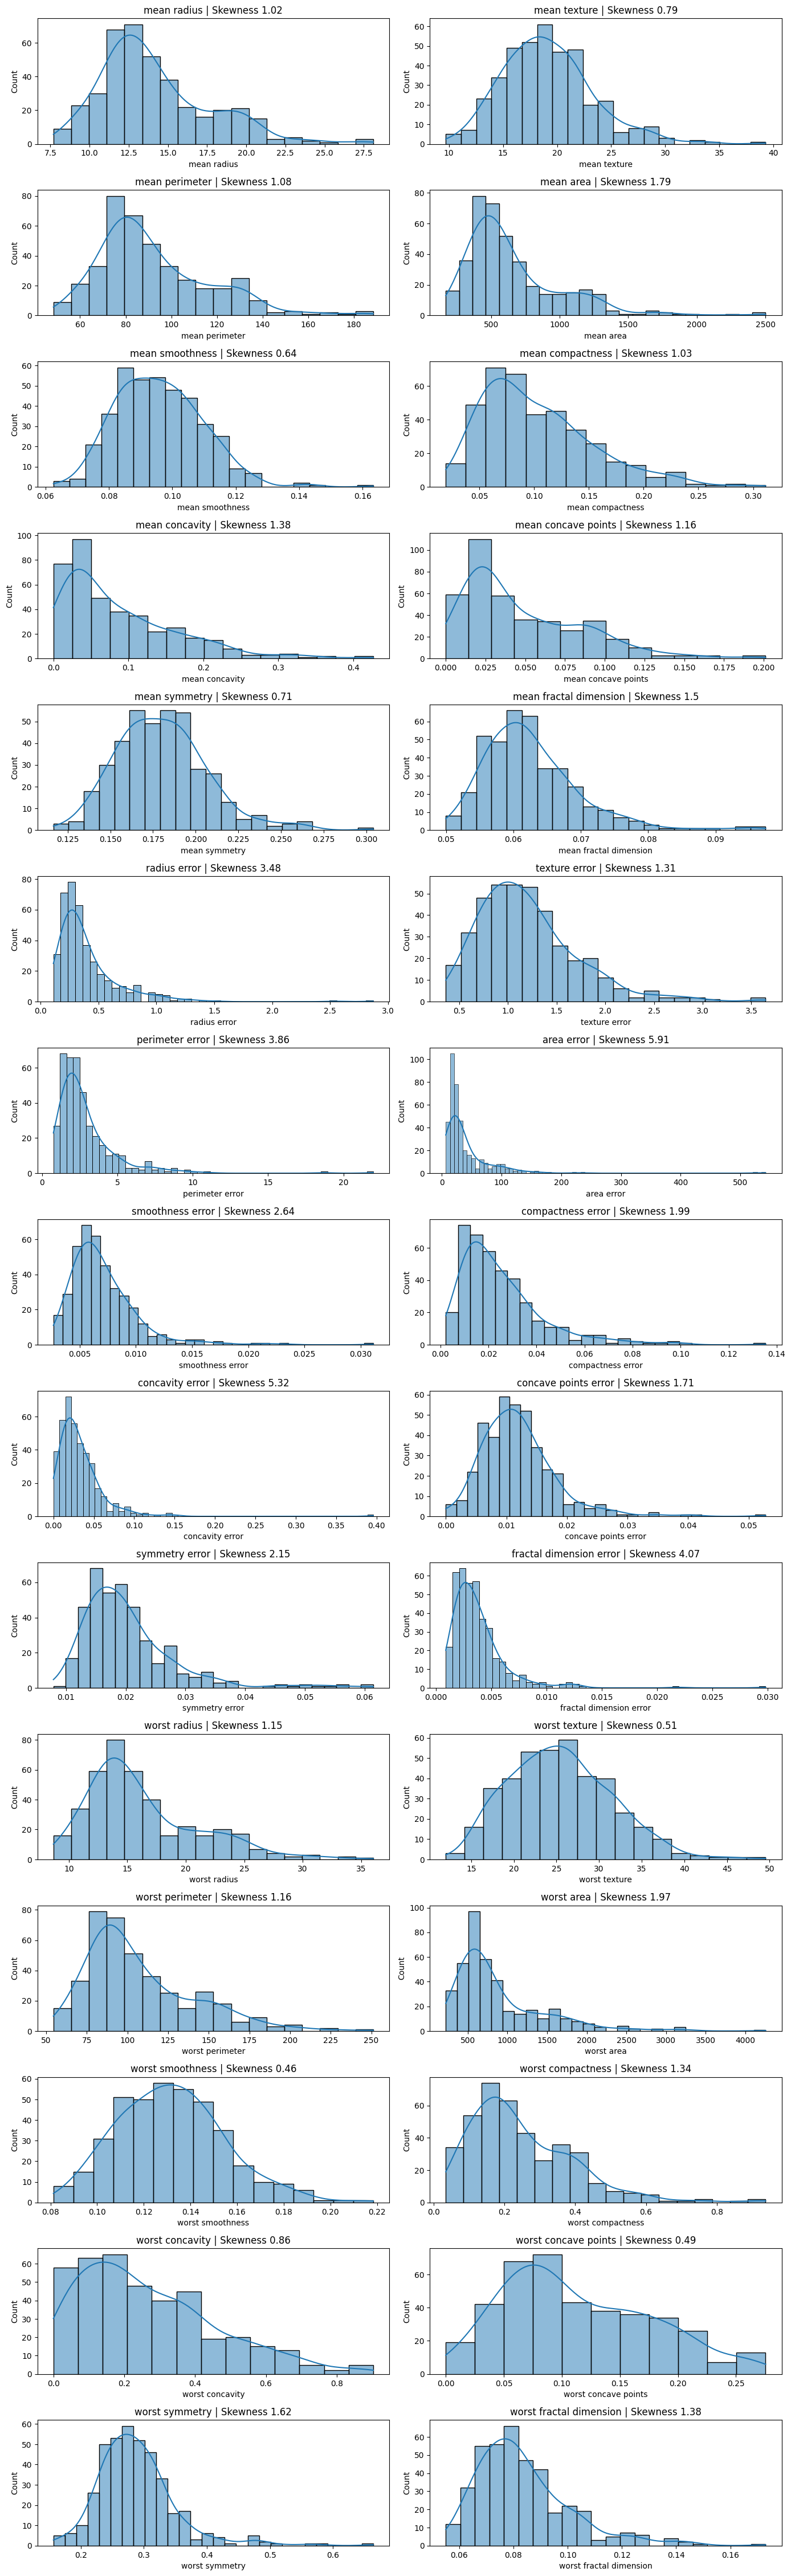

In [45]:
# Kernel density plot, for understending variance
import seaborn as sns

n = X_train.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(14, len(n) * 3))
for i, feature in enumerate(n, 1):
  plt.subplot(len(n), 2, i)
  sns.histplot(X_train[feature], kde = True)
  plt.title(f"{feature} | Skewness {round(X_train[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

### Correlation Heatmap
This is a correlation matrix between every pair of numeric features. Each cell go from -1 to 1. If the number is close to one the feature have a strong positive link, when is close to -1 they move in opposite direction.
This matrix is helpful for the preprocessing, to detect features containing the same information and do some feature selection maby dropping the highly redundant features.


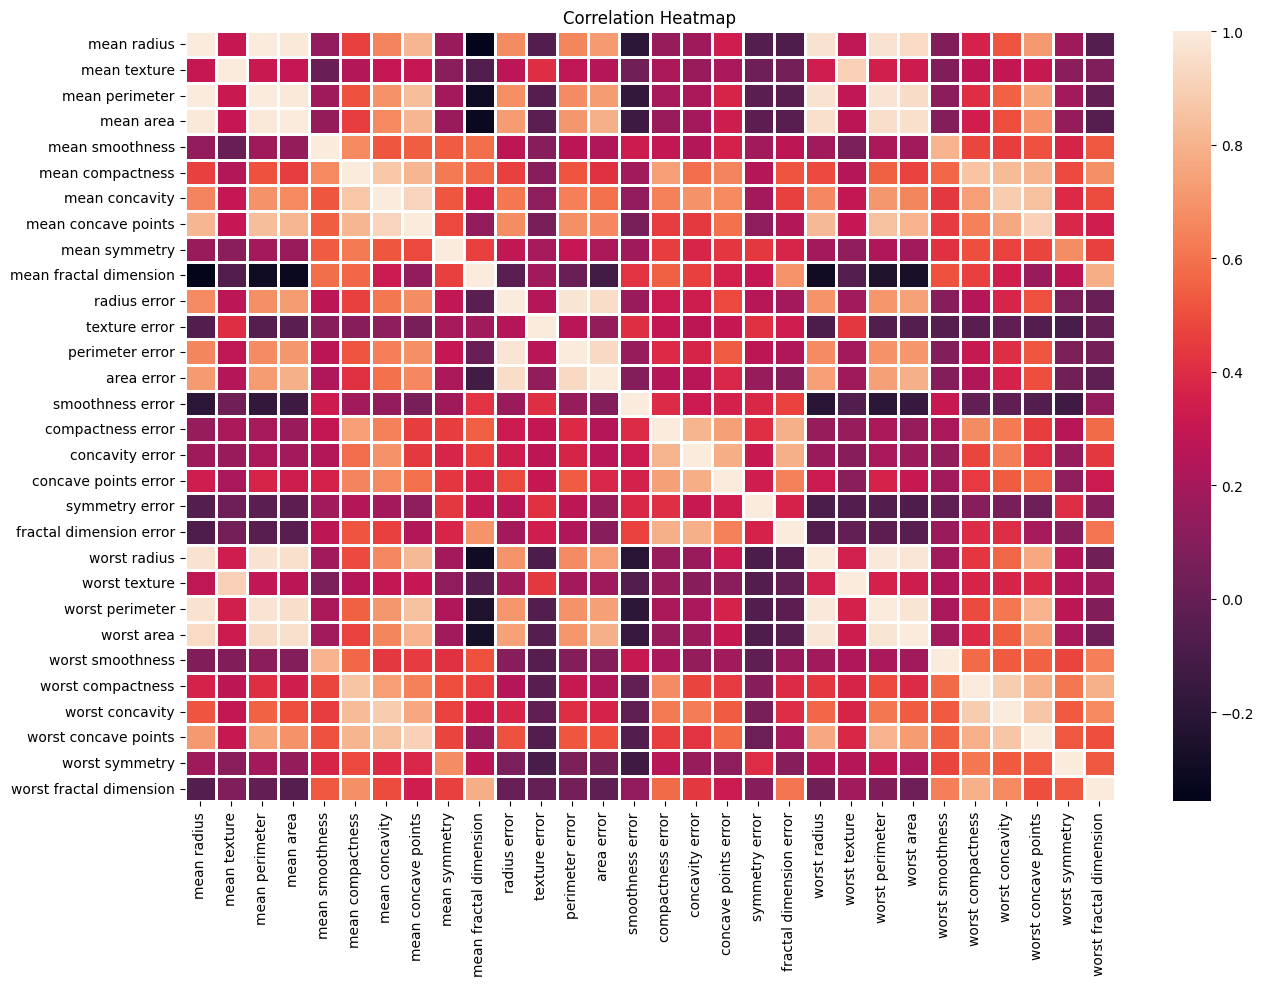

In [46]:
plt.figure(figsize=(15, 10))
sns.heatmap(X_train.corr(), linewidths=2)
plt.title("Correlation Heatmap")
plt.show()

## Preprocessing
We apply feature scaling and no other preprocessing. We use standardScaler:

$$ z = \frac {x - u}{ s} $$
- $ u $ mean of the training samples.
- $ s $ tandard deviation of the training samples.

many features have very different ranges, whitout this scaling the larger features dominate the distance for the gradient including methods.

In [47]:
from sklearn.preprocessing import StandardScaler
# Standardize features by removing the mean and scaling to unit variance.
# The standard score of a sample x is calculated as:
# z = (x - u) / s
# u is the mean of the training samples and s is the standard deviation of the training samples
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# MODELS and RESULTS

## Linear Regression

**Model Equation**
- One feature:
$$ \hat{y} = wx + b $$
- Multiple linear regression:
$$ \hat{y} = w_1x_1 + w_2x_2 + ... + w_nx_n + b $$
- Vector form
$$ \hat{y} = 𝐰^T𝘅 + b $$

**Loss Function**

- Mean Squared Error (MSE)
  $$
  E = \frac{1}{n} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
  $$


Linear regression tries to fit the bestpossibol straight line(or hyperplane) that explain the best the reletionship between the input features and the target.

Linear regression work well when the relationship between features and target is linear, features are not strongly correlated with each other and there is a large amount of clean data.

Linear regression become unreliable when the relashionship in the data is not linear, there are strong outliers, important features are missing and the dataset is really small.

Accuracy:  0.9473684210526315
True Positives:  106
True Negatives:  56
False Positives:  7
False Negatives:  2


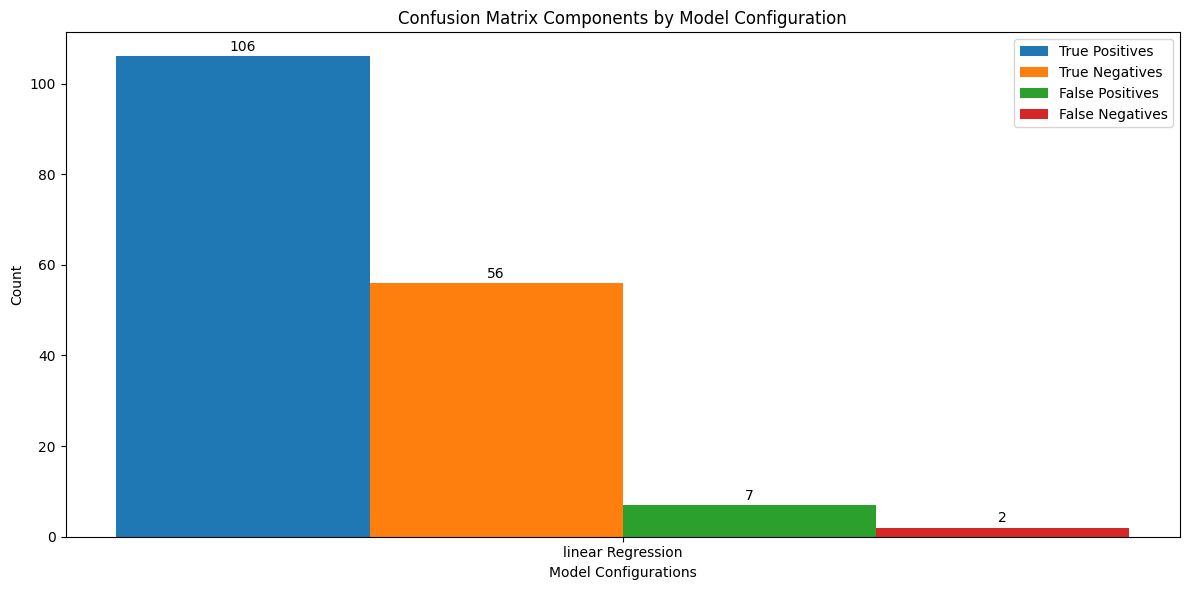

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LinearRegression()
# Fit the model whit the training data
model.fit(X_train, y_train)

# Make prediction on test
y_pred = model.predict(X_test)

# Convert predictions to binary
y_pred = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Positives: ", tp)
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)

# Data reorganize for plot
x_labels = ['linear Regression']
confusion_metrics = [(tp, tn, fp, fn)]

# CONFUSION MATRIX
x = np.arange(len(x_labels))
width = 0.2
# Create a bar plot for confusion matrix components
plt.figure(figsize=(12, 6))
plt.bar(x - width*1.5, tp, width, label='True Positives')
plt.bar(x - width/2, tn, width, label='True Negatives')
plt.bar(x + width/2, fp, width, label='False Positives')
plt.bar(x + width*1.5, fn, width, label='False Negatives')

# Add values on top of each bar for confusion matrix components
for i, (tp, tn, fp, fn) in enumerate(confusion_metrics):
    plt.text(i - 0.2*1.5, tp + 0.5, f'{tp}', ha='center', va='bottom')
    plt.text(i - 0.2/2, tn + 0.5, f'{tn}', ha='center', va='bottom')
    plt.text(i + 0.2/2, fp + 0.5, f'{fp}', ha='center', va='bottom')
    plt.text(i + 0.2*1.5, fn + 0.5, f'{fn}', ha='center', va='bottom')

plt.xlabel("Model Configurations")
plt.title("Confusion Matrix Components by Model Configuration")
plt.xticks(x, x_labels)
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


## Neural Network (MLPClassifier)

A Multi-Layer Perceptron is a neural network made of layers of simple neurons. Each layer applies a linear transformation followed by a non-linear activation, the train is based on backpropagation and gradient-based optimization.

- Loss Function Binary:
$$
    L = -\frac{1}{N} \left[ \sum_{j=1}^{N} \left( t_j \log(p_j) + (1 - t_j) \log(1 - p_j) \right) \right]
$$
- Multi-class
$$
  L = - \frac{1}{N} \sum_{n=1}^{N} \sum_{k=1}^{K} t_{ik} \log(\hat{p}_{ik})
$$

MLP work well whit non-linear relationship finding complex patterns between features, when there is enough data and moderate noise.

MLP is fragile when there is small dataset, there is unscaled features, there is class inbalance and there is a non-convex loss function that can end in a poor local minimum.

  

Accuracy:  0.9941520467836257
True Positives:  108
True Negatives:  62
False Positives:  1
False Negatives:  0


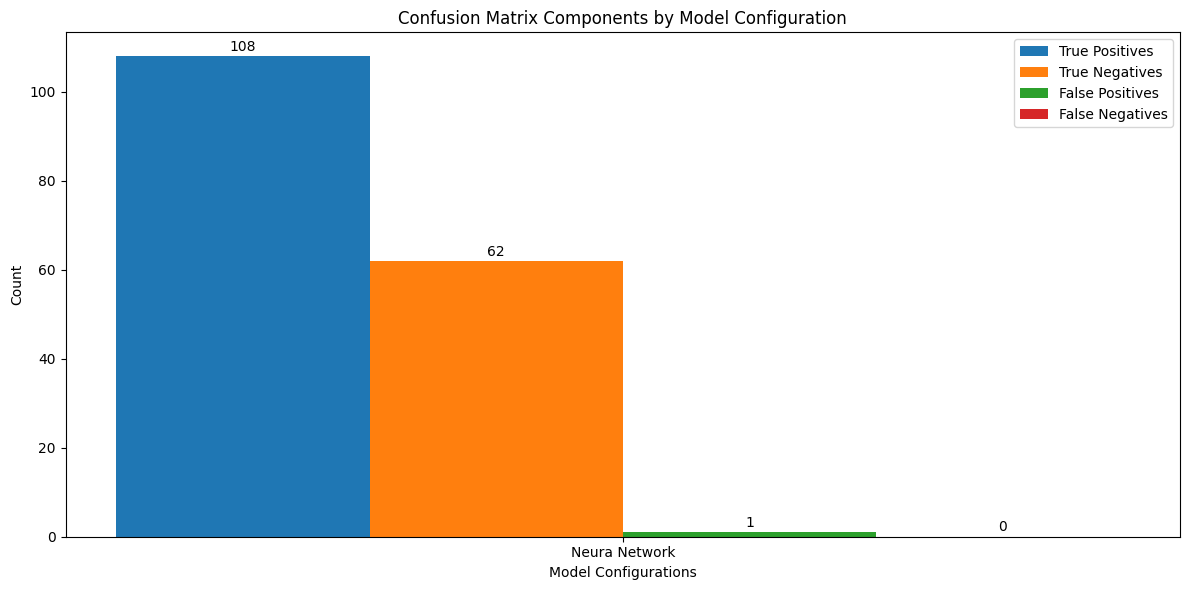

In [49]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    alpha=1e-03, # L2 regularization, weight decay, reduce overfitting
    hidden_layer_sizes=(60, 30, 10),  # Number of neurosn per hidden layer
    activation = 'relu',  # Activation function,
    max_iter=500,   # Max optimization steps
    random_state=42   # Fix random for reproducibility
  )


# Fit model whit training data
mlp.fit(X_train, y_train)

# Prediction
y_pred_nn = mlp.predict(X_test)


# Calculate accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Accuracy: ", accuracy_nn)

# Confusion Matrix
tn_nn, fp_nn, fn_nn, tp_nn = confusion_matrix(y_test, y_pred_nn).ravel()
print("True Positives: ", tp_nn)
print("True Negatives: ", tn_nn)
print("False Positives: ", fp_nn)
print("False Negatives: ", fn_nn)

# Definition of data for plotting
x_labels = ['Neura Network']
confusion_metrics = [(tp_nn, tn_nn, fp_nn, fn_nn)]

# CONFUSION MATRIX
x = np.arange(len(x_labels))
width = 0.2
# Create a bar plot for confusion matrix components
plt.figure(figsize=(12, 6))
plt.bar(x - width*1.5, tp_nn, width, label='True Positives')
plt.bar(x - width/2, tn_nn, width, label='True Negatives')
plt.bar(x + width/2, fp_nn, width, label='False Positives')
plt.bar(x + width*1.5, fn_nn, width, label='False Negatives')

# Add values on top of each bar for confusion matrix components
for i, (tp, tn, fp, fn) in enumerate(confusion_metrics):
    plt.text(i - 0.2*1.5, tp + 0.5, f'{tp_nn}', ha='center', va='bottom')
    plt.text(i - 0.2/2, tn + 0.5, f'{tn_nn}', ha='center', va='bottom')
    plt.text(i + 0.2/2, fp + 0.5, f'{fp_nn}', ha='center', va='bottom')
    plt.text(i + 0.2*1.5, fn + 0.5, f'{fn_nn}', ha='center', va='bottom')

plt.xlabel("Model Configurations")
plt.title("Confusion Matrix Components by Model Configuration")
plt.xticks(x, x_labels)
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


## Decision Tree

Decision Tree is a non-parametric model, that split the feature space into branch by a sequence of if-then. During the recoursive training choose to splits the best separate classes, the prediction are made based the majority class in the reached leaf.

Tree work well with non-linear patterns and interactions, with mixed features types and is very interpreatable so easy to visualize and understend the rules.

Tree is very fragile to overfitting, with unstable and small datasets, when there is class imbalance and is very sensitive to the missing values.

Accuracy:  0.9590643274853801
True Positives:  105
True Negatives:  59
False Positives:  4
False Negatives:  3


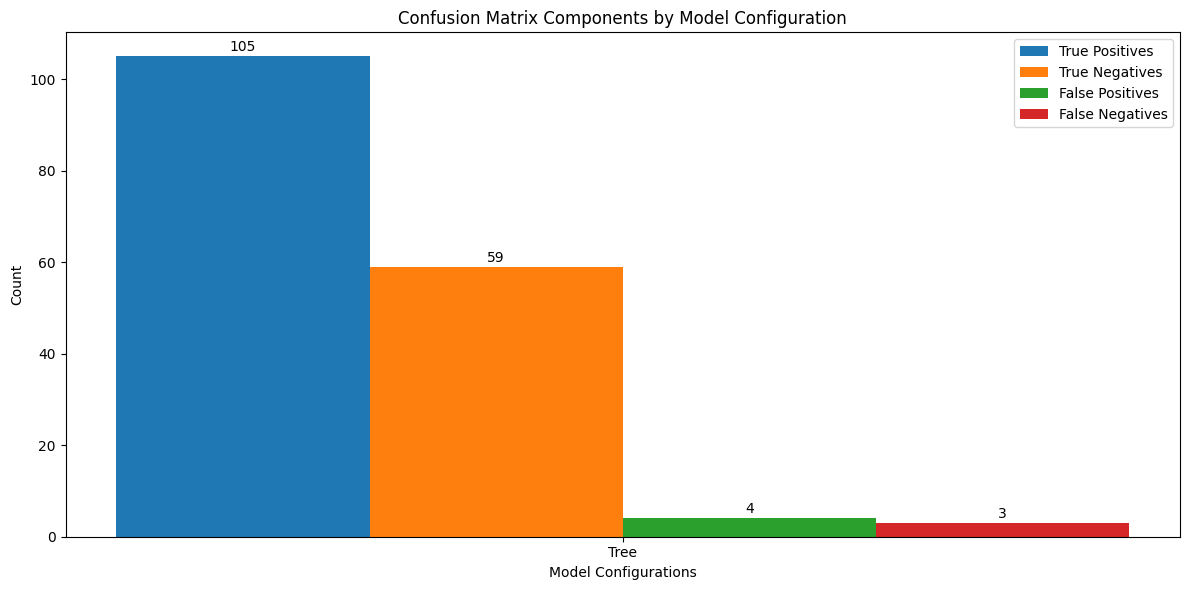

In [50]:
from sklearn.tree import DecisionTreeClassifier

# Fixing max depth of the tree
MAX_DEPTH = 5
decision_tree_model = DecisionTreeClassifier(max_depth = MAX_DEPTH, random_state = 42)

# Fit model whit training data
decision_tree_model.fit(X_train, y_train)

# Prediction on the test data
y_pred_tree = decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy: ", accuracy_tree)

# Confusion Matrix
tn_tree, fp_tree, fn_tree, tp_tree = confusion_matrix(y_test, y_pred_tree).ravel()
print("True Positives: ", tp_tree)
print("True Negatives: ", tn_tree)
print("False Positives: ", fp_tree)
print("False Negatives: ", fn_tree)

# Data for the plot
x_labels = ['Tree']
confusion_metrics = [(tp_tree, tn_tree, fp_tree, fn_tree)]

# CONFUSION MATRIX
x = np.arange(len(x_labels))
width = 0.2
# Create a bar plot for confusion matrix components
plt.figure(figsize=(12, 6))
plt.bar(x - width*1.5, tp_tree, width, label='True Positives')
plt.bar(x - width/2, tn_tree, width, label='True Negatives')
plt.bar(x + width/2, fp_tree, width, label='False Positives')
plt.bar(x + width*1.5, fn_tree, width, label='False Negatives')

# Add values on top of each bar for confusion matrix components
for i, (tp, tn, fp, fn) in enumerate(confusion_metrics):
    plt.text(i - 0.2*1.5, tp + 0.5, f'{tp_tree}', ha='center', va='bottom')
    plt.text(i - 0.2/2, tn + 0.5, f'{tn_tree}', ha='center', va='bottom')
    plt.text(i + 0.2/2, fp + 0.5, f'{fp_tree}', ha='center', va='bottom')
    plt.text(i + 0.2*1.5, fn + 0.5, f'{fn_tree}', ha='center', va='bottom')

plt.xlabel("Model Configurations")
plt.title("Confusion Matrix Components by Model Configuration")
plt.xticks(x, x_labels)
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


## SVM

Support Vector Machine find a decision hyperplae that maximize the margin between classes. Only the subset of support vectors determinate this hyperplane. Whit kernels SVM can model non-linear decision durfaces
- Decision Function (linear)
$$ f(x) = 𝘄^T𝙭+b $$
- Objective Function:
   $$
   \min_{w, b} \frac{1}{2} ||w||^2 + C \sum_{i=1}^{N} \xi_i
   $$
   - where: $\xi_i $ are the slack variables that allow points that fall within the margin.

SVM works well when there is a clear margin separation, there is non-linear boundaries, with medium size datasets and is robust to overfitting.

SMV is fragile to features, need always standardizationa and normalization, training can be slow and havy and the class imbalance can bias the margin

Accuracy:  0.9824561403508771
True Positives:  107
True Negatives:  61
False Positives:  2
False Negatives:  1


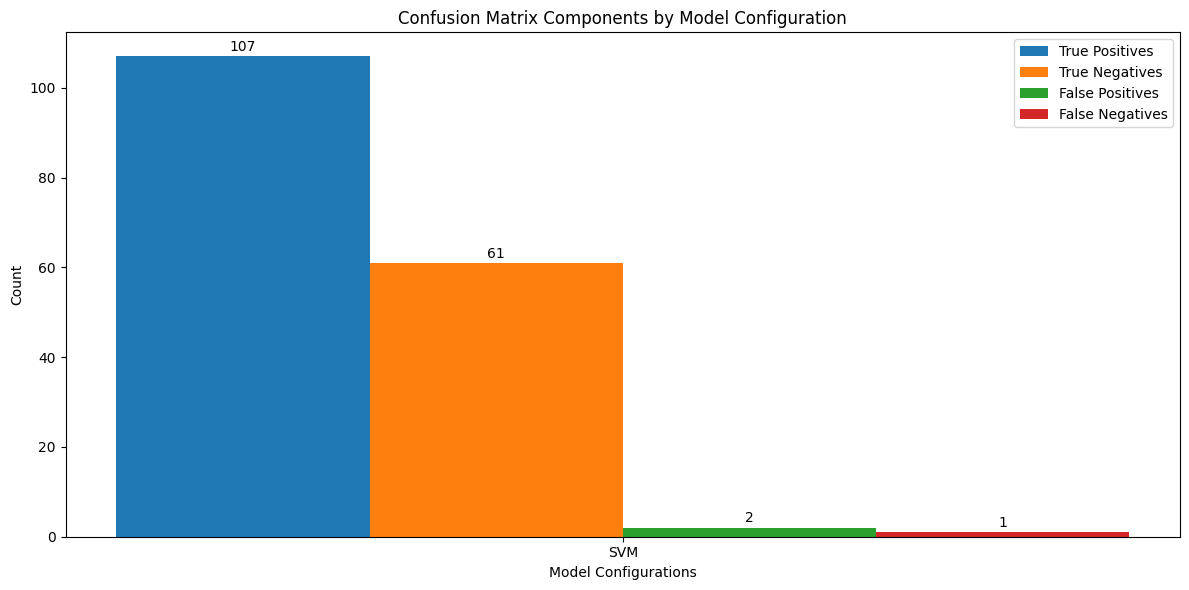

In [54]:
from sklearn.svm import SVC

svm = SVC(
    kernel='rbf',   # Kernel type, RBF add nonlinearity
    C=1 # Tradeoff between maring width and misclassification
  )

# Fitting the training data in the model
svm.fit(X_train, y_train)

# Prediction over the test data
y_pred_svm = svm.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy: ", accuracy_svm)

# Confusion Matrix
tn_svm, fp_svm, fn_svm, tp_svm = confusion_matrix(y_test, y_pred_svm).ravel()
print("True Positives: ", tp_svm)
print("True Negatives: ", tn_svm)
print("False Positives: ", fp_svm)
print("False Negatives: ", fn_svm)

# Data for the plot
x_labels = ['SVM']
confusion_metrics = [(tp_svm, tn_svm, fp_svm, fn_svm)]

# CONFUSION MATRIX
x = np.arange(len(x_labels))
width = 0.2
# Create a bar plot for confusion matrix components
plt.figure(figsize=(12, 6))
plt.bar(x - width*1.5, tp_svm, width, label='True Positives')
plt.bar(x - width/2, tn_svm, width, label='True Negatives')
plt.bar(x + width/2, fp_svm, width, label='False Positives')
plt.bar(x + width*1.5, fn_svm, width, label='False Negatives')

# Add values on top of each bar for confusion matrix components
for i, (tp, tn, fp, fn) in enumerate(confusion_metrics):
    plt.text(i - 0.2*1.5, tp + 0.5, f'{tp_svm}', ha='center', va='bottom')
    plt.text(i - 0.2/2, tn + 0.5, f'{tn_svm}', ha='center', va='bottom')
    plt.text(i + 0.2/2, fp + 0.5, f'{fp_svm}', ha='center', va='bottom')
    plt.text(i + 0.2*1.5, fn + 0.5, f'{fn_svm}', ha='center', va='bottom')

plt.xlabel("Model Configurations")
plt.title("Confusion Matrix Components by Model Configuration")
plt.xticks(x, x_labels)
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

## Comparison

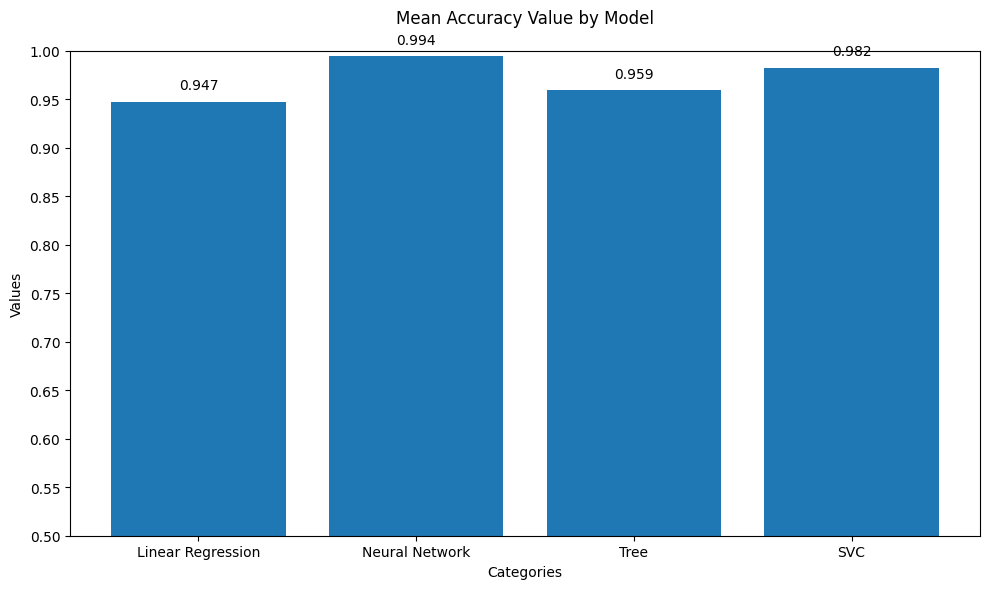

In [52]:
# ACCURACY PLOT
# List of accuracy
accuracy_value = [accuracy, accuracy_nn, accuracy_tree, accuracy_svm]
# Models used
models = ["Linear Regression", "Neural Network", "Tree", "SVC"]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_value)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.ylim(0.5, 1)
plt.title('Mean Accuracy Value by Model', pad=20)
plt.yticks(np.arange(0.5, 1.01, 0.05))

# Add the accuracy values on top of each bar
for i, value in enumerate(accuracy_value):
    plt.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()



## Discussion
This final comparison plot shows that all the models have reached a very good approximation on this specific task. The ranking show that the MLP whit 99.4% of accuracy is the best model in this situation followed by SVC (98.2%) and the remaining models around 94/95%. However the gap between the top models is very small and that mught change using a different train/test split ot validation methods. In a dataset like this while overall the accuracy is high can hide important trade-off between false negative and false positive.

---

## Future Work

An idea for the future work can be try different parameters for the models like the max_depth for the tree or different numbers of neurons in the hidden layer. Other idea is adding more methods or change the train/test or validation split to see how the resoult ranking change.

